<a href="https://colab.research.google.com/github/GOPIKA-S-S/ML-project/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Tools and Libraries**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc

**Exploring the Data **




In [3]:
df = pd.read_csv('dataset_heart.csv')
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [80]:
value_counts = df['target'].value_counts()
value_counts

1    165
0    138
Name: target, dtype: int64

([<matplotlib.axis.XTick at 0x79562c3219f0>,
 [Text(1, 0, 'No Heart Disease (0)'), Text(0, 0, 'Heart Disease (1)')])

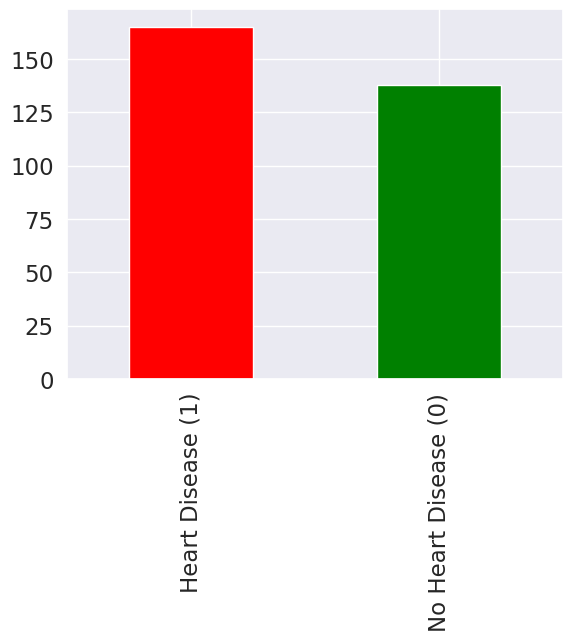

In [82]:

df['target'].value_counts().plot(kind='bar', color=['red','green']);
plt.xticks(value_counts.index, ['No Heart Disease (0)', 'Heart Disease (1)'])

In [8]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Checking Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
len(df)

303

In [12]:
#Percentage of Female
207/303

0.6831683168316832

Percentage of males

In [83]:
#percentage of males
96/303

0.31683168316831684

In [14]:
# checking how many male and female have disease
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [15]:
# Male patient in percent
72/96

0.75

In [16]:
# Female patient in percent
93/207

0.4492753623188406

Analysing Heart disease according to gender

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

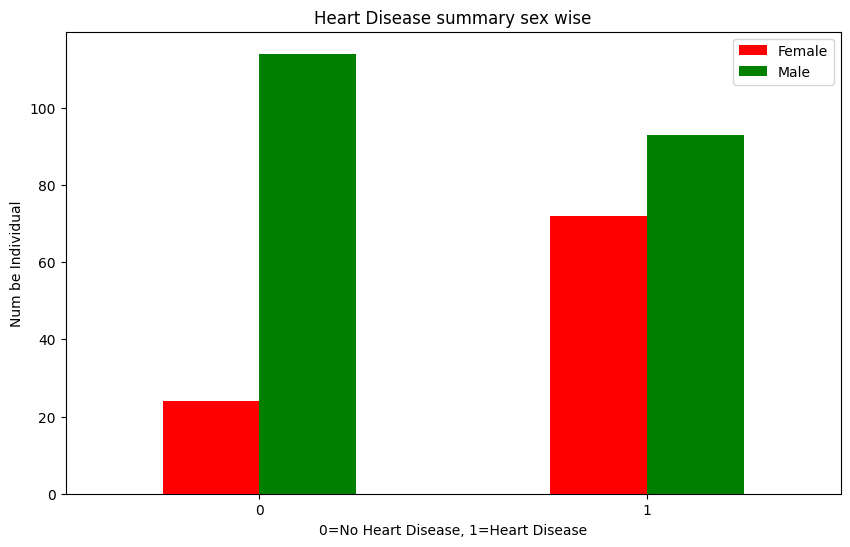

In [17]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;

Analysing Average maximum heart rate for different age group

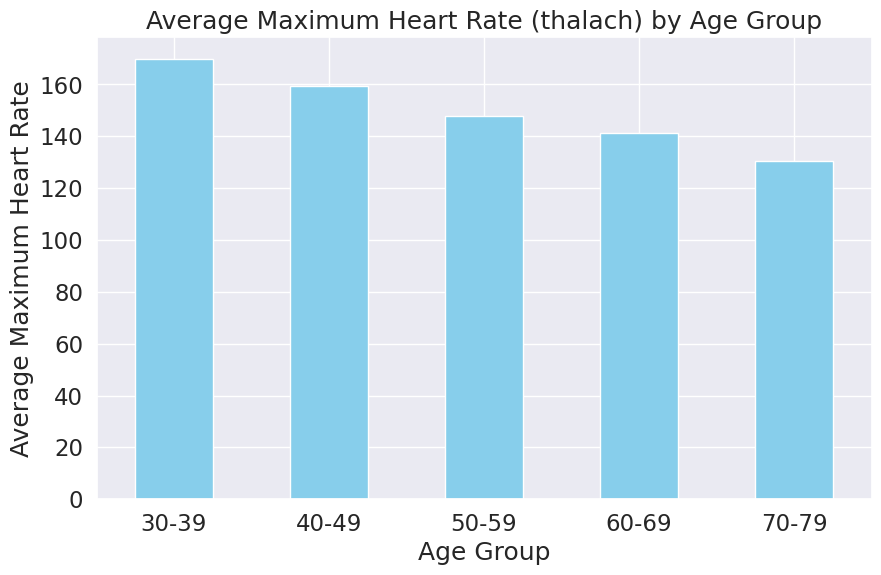

In [86]:

# Create age bins
bins = [29, 39, 49, 59, 69, 79]

# Define age group labels
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']

# Cut the 'age' column into age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Calculate the mean 'thalach' for each age group
age_thalach_summary = df.groupby('age_group')['thalach'].mean()

# Create a bar plot
age_thalach_summary.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Maximum Heart Rate (thalach) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Maximum Heart Rate')
plt.xticks(rotation=0)
plt.show()


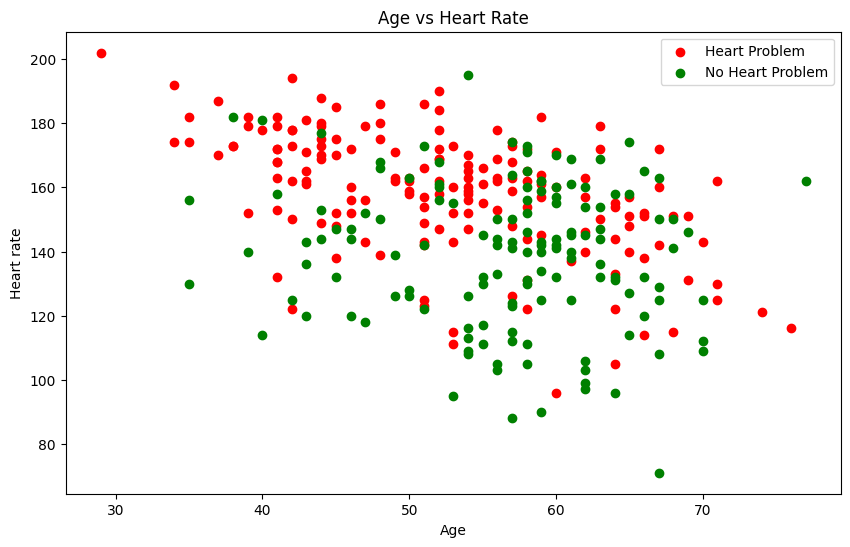

In [20]:
# Finding Patterns in Data Using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
# plt.scatter(df.age,df.thalach,c='green'); # for total data
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red'); # for those who have heart disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green'); # for those who have not heart disease
# doing makeup hahahahahah
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(['Heart Problem','No Heart Problem']);

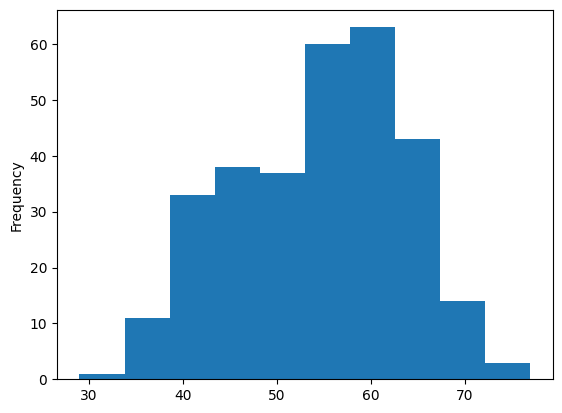

In [21]:
# Create histogram to see age Distribution
df.age.plot.hist();

In [97]:
df.cp.value_counts()
# Print statements for each value



0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [98]:
# Print statements for each value
print("Value 0: typical angina: chest pain due to decreased blood flow to the heart")
print("Value 1: atypical angina: chest pain not related to a heart problem")
print("Value 2: non-anginal pain: chest pain not related to the heart")
print("Value 3: asymptomatic: no chest pain showing a heart problem")


Value 0: typical angina: chest pain due to decreased blood flow to the heart
Value 1: atypical angina: chest pain not related to a heart problem
Value 2: non-anginal pain: chest pain not related to the heart
Value 3: asymptomatic: no chest pain showing a heart problem


In [99]:
# cross always between two tab(columns)
pd.crosstab(df.cp,df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


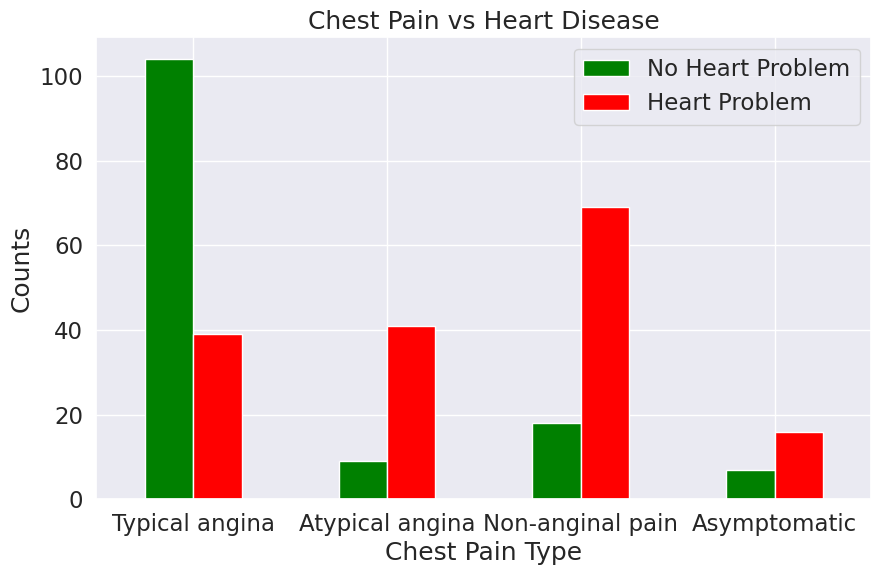

In [101]:
# Define the descriptions for each value of 'cp'
cp_descriptions = {
    0: "Typical angina",
    1: "Atypical angina",
    2: "Non-anginal pain",
    3: "Asymptomatic"
}

# Create the bar chart
ax = pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6), color=['green', 'red'])

# Set the x-axis tick labels using the descriptions
ax.set_xticklabels([cp_descriptions[i] for i in range(4)], rotation=0)

# Add chart title, labels, and legend
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['No Heart Problem', 'Heart Problem'])
plt.show()


CORRELATION

In [26]:
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


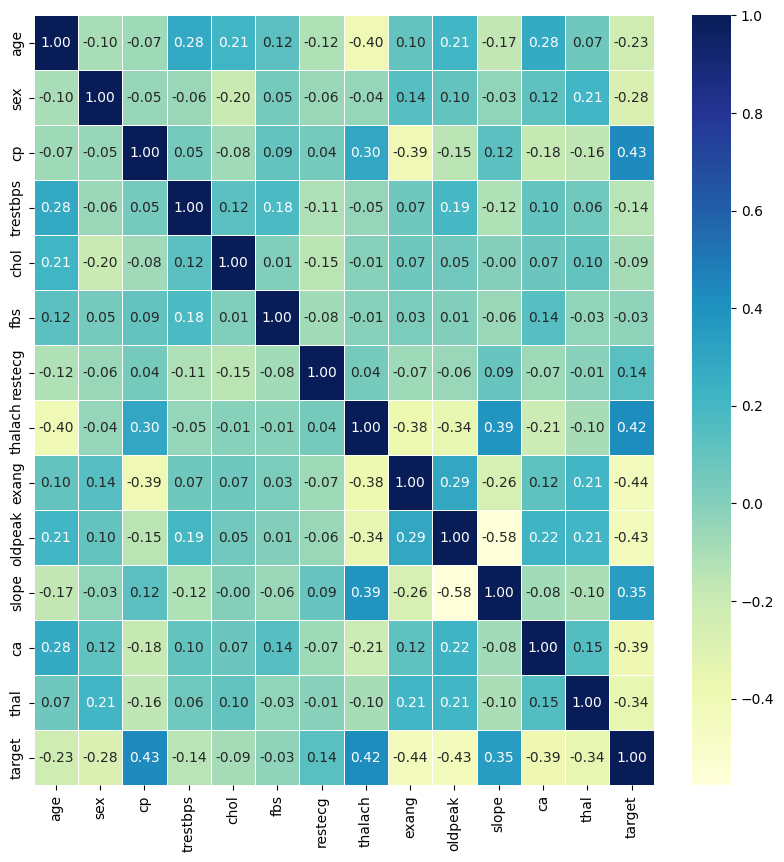

In [27]:
# Lets Draw Corelation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap='YlGnBu'); # fmt: value after point two

In [28]:
# Modelling split the data
# df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [29]:
# Split into test and train data
x = df.drop('target', axis=1)
y = df['target']

In [30]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
# using Random seed, so that others could produce the same result
np.random.seed(7)
# Split into test and train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
len(x)

303

In [34]:
len(x_train)

242

In [35]:
242/303

0.7986798679867987

**Choosing the right model**

In [36]:
# Putting the value into a dictionary
models = {'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'Logistic Regression':LogisticRegression()}
# def : is function
# fit_and_score : is model
# Random seed : for result reproduceble
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # Make a dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [37]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7377049180327869}

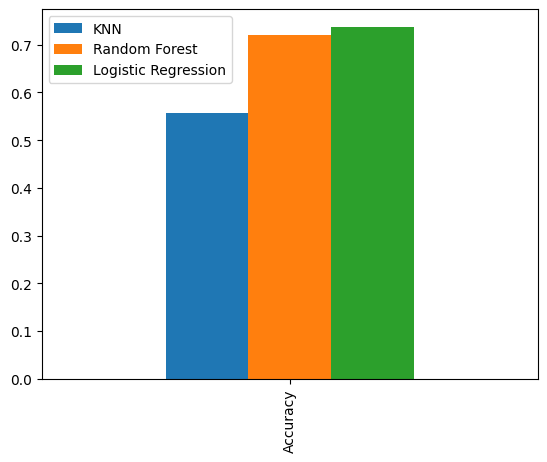

In [38]:
#Plotting the accuracy of models
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.plot.bar();

In [39]:
KNN = KNeighborsClassifier()
KNN.set_params()

KNeighborsClassifier()

Hyper parameter Tuning for KNN

In [40]:

train_score = []
test_score = []
# Create range to be test for n_neighbors
nneighbors = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()

# Looping through the range
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for the value
    KNN.fit(x_train,y_train)
    # Update the training score
    train_score.append(KNN.score(x_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(x_test,y_test))

In [41]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [42]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

Max KNN Score:70.49%


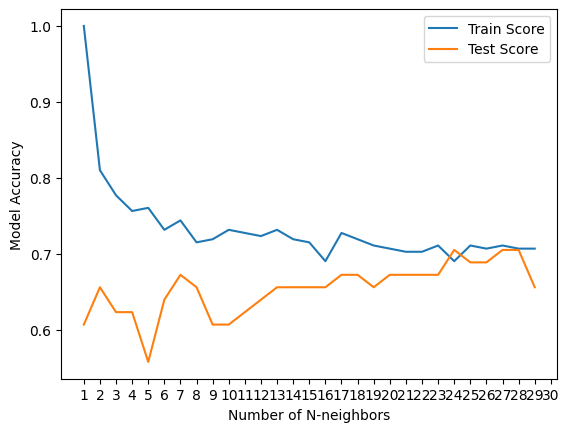

In [43]:
plt.plot(nneighbors,train_score, label='Train Score')
plt.plot(nneighbors,test_score, label='Test Score')
plt.xticks(np.arange(1,31,1))
# Static beauty
plt.xlabel('Number of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend();
print(f'Max KNN Score:{max(test_score)*100:0.2f}%')

**Hyperparameter tuning using Randomized Search CV and Grid SearchCV**

---



In [45]:

LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}
RFC_hp = {
    'n_estimators':np.arange(10,1600,100),
    'max_depth':[None,3,5,6,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

**Tunning Logistic Regression with Randomized Search CV**

In [46]:
# tune Logistic Regression
np.random.seed(7)
# Lets use RSCV to tune HP

lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,# n_iter = number of combination
                       verbose=True)

# Fit the random HP search model for LR
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
lr.score(x_test,y_test)

0.7540983606557377

In [48]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

**Tunning Logistic Regression with Randomized Search CV**

In [49]:
# Tune Logistics Regression
np.random.seed(7)
# Lets use RSCV to tune HP

rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,# n_iter = number of combination
                       verbose=True)

# Fit the random HP search model for LR
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [50]:
rfc.score(x_test,y_test)
# below value after improvement of RandomForestClassifier

0.7049180327868853

In [51]:
rfc.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

**Tunning Logistic Regression with Grid Search CV**

In [52]:
# tune Logistic Regression using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP

lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
lr_gs.score(x_test,y_test)

0.7540983606557377

In [54]:
lr_gs.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

**Tunning Random Forest Classifier with Grid Search CV**

In [55]:
# tune Random Forest Classifier using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP
RFC2_hp = {
    'n_estimators':np.arange(1,101,50),
    'max_depth':[None,3,50],
    'min_samples_split':np.arange(2,8,2),
    'min_samples_leaf':np.arange(1,7,2)
}

rfc_gs = GridSearchCV(RandomForestClassifier(n_jobs=1),
                       param_grid=RFC2_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
rfc_gs.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [56]:
rfc_gs.score(x_test,y_test)

0.7377049180327869

In [57]:
 rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 51}

{'KNN': 0.5573770491803278, After Improving = 0.7049

'Random Forest': 0.7213114754098361, After Improving = 0.7377049180327869

'Logistic Regression': 0.7377049180327869}, After Improving = 0.7540983606557377

**ROC for Logistic Regression**

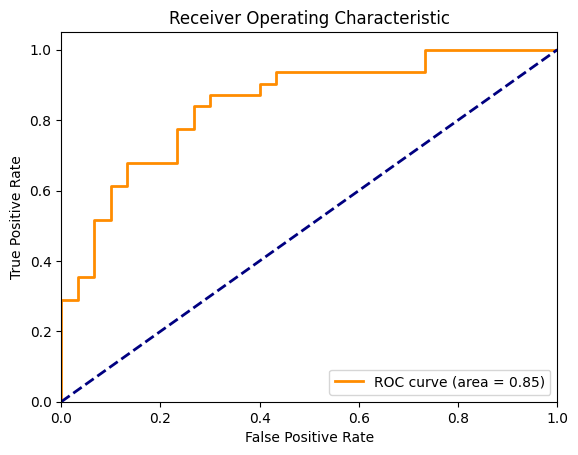

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming lr_gs is your trained logistic regression model
y_scores = lr_gs.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**CONFUSION MATRIX**

In [59]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions using a threshold
threshold = 0.5  # Example threshold
y_pred = (y_scores > threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18 12]
 [ 3 28]]


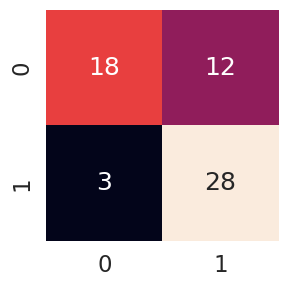

In [60]:
# Drawing heat map with confusion matrix

sns.set(font_scale=1.5)

def plot_confusion(y_test,y_pred):


    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                    annot=True,
                    cbar=False)
plot_confusion(y_test,y_pred)

**LOGISTIC REGRESSION REPORT**

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [62]:
lr_gs.best_params_
# create instance
lr = LogisticRegression(C=0.615848211066026,
                       solver='liblinear')

In [63]:
# Cross validation Accuracy

cv_accuracy = cross_val_score(lr,
                             x,
                             y,
                             cv=7, # cv=135,it give best result
                             scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8284506191482934

In [64]:
# Cross validation precision
# precision value must be less than recall

cv_precision = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8108267922553637

In [65]:
# Cross validation recall

cv_recall = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.89648033126294

In [66]:
# Cross validation f1-score

cv_f1 = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8508447334977947

<Figure size 1000x600 with 0 Axes>

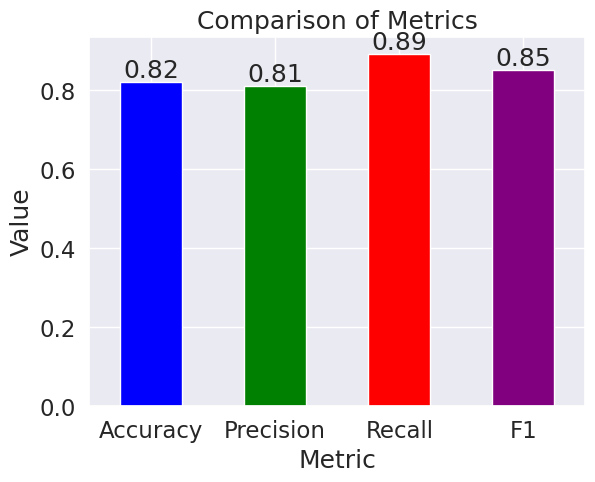

In [103]:

cv_accuracy = [0.82]
cv_precision = [0.81]
cv_recall = [0.89]
cv_f1 = [0.85]


cv_plot = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Value': [cv_accuracy[0], cv_precision[0], cv_recall[0], cv_f1[0]]
})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = cv_plot.plot.bar(x='Metric', y='Value', rot=0, color=['blue', 'green', 'red', 'purple'], legend=False)


plt.title('Comparison of Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [69]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [70]:
# check coffiecient
lr.fit(x_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [71]:
# check coffiecient
lr.fit(x_train,y_train)
lr.coef_

array([[ 0.02252678, -1.36972472,  0.79033601, -0.02405914, -0.00188849,
         0.45615731,  0.40549708,  0.03558521, -0.78346587, -0.56674308,
         0.52855363, -0.64573418, -1.10278199]])

**FEATURE IMPORTANCE**

In [72]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef


{'age': 0.02252678088859591,
 'sex': -1.3697247235123737,
 'cp': 0.790336009798431,
 'trestbps': -0.024059142708206346,
 'chol': -0.001888490478208966,
 'fbs': 0.45615730903073565,
 'restecg': 0.4054970774699765,
 'thalach': 0.03558520921757022,
 'exang': -0.7834658685604866,
 'oldpeak': -0.5667430774730721,
 'slope': 0.5285536289797753,
 'ca': -0.6457341797406612,
 'thal': -1.1027819922077673}

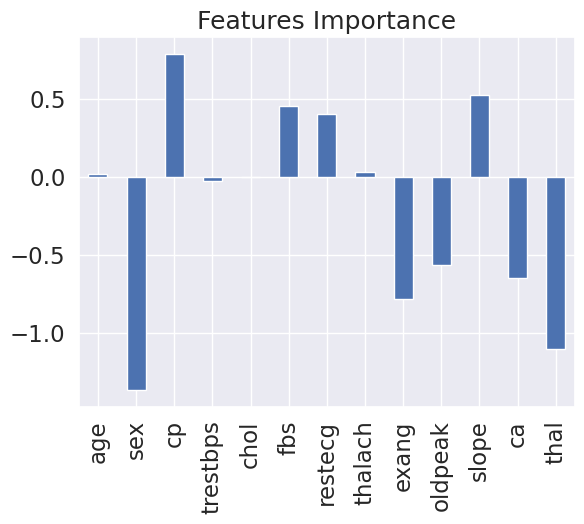

In [73]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title='Features Importance', legend=False);

The important features are cp,slope,fbs and restecg

**CONCLUSION**

Among KNN,Random Forest and Logistic Regression,Logistic Regression is predicting more accurately with accuracy 82%,precision 81%,Recall 89%,F1 score 85%